In [231]:
import numpy as np
from numpy.random import choice
import ot
from tqdm import tqdm_notebook as tqdm
from IPython.display import clear_output

In [235]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

In [224]:
n, m = 4, 4
a = np.random.randn(n) ** 2
b = np.random.randn(m) ** 2
a /= np.sum(a)
b /= np.sum(b)

In [225]:
cost = np.random.randn(n, m) ** 2
true_min_cost = (ot.emd(a, b, cost) * cost).sum()

In [229]:
def perturb(p, k=10):
    p = p.copy()
    n, m = p.shape

    for _ in range(k):
        i1, i2 = choice(range(n), size=2, replace=False)
        j1, j2 = choice(range(n), size=2, replace=False)

        if cost[i1, j1] > cost[i1, j2]:
            j1, j2 = j2, j1

        swap = min(1-p[i1, j1], 1-p[i2, j2], p[i1, j2], p[i2, j1]) * np.random.rand()
        p[i1, j1] += swap
        p[i1, j2] -= swap
        p[i2, j1] -= swap
        p[i2, j2] += swap
    return p

def marry(p, q):
    lmbda = np.random.rand()
    return p * lmbda + (1-lmbda) * q

def eval_cost(p):
    return (p * cost).sum()

In [232]:
fam_size = 100
n_ch = 5

In [250]:
initial = np.multiply.outer(a,b)
fits = {}
for k in [1, 5, 10, 20]:
    fit = [eval_cost(initial)]
    for _ in tqdm(range(100)):
        family = np.array([initial.copy() for _ in range(fam_size)])

        new_family = np.zeros((fam_size * n_ch, n,m))

        for i, x in enumerate(family):
            for j, y in enumerate(family[np.random.randint(low=0, high=fam_size, size=n_ch),:,:]):
                new_family[i * n_ch + j, :, :] = perturb(marry(x,y), k=k)

        fitness = list(map(lambda p : eval_cost(p), new_family))
        survivors = np.argpartition(fitness, fam_size)[:fam_size]
        fit.append(np.min(fitness))
        family = np.array(new_family)[survivors]
    fits[k] = fit


HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

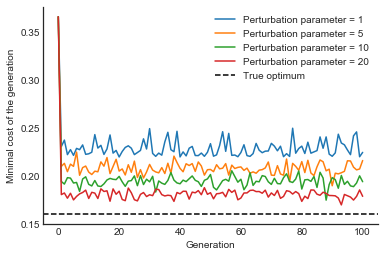

In [252]:
for k, f in fits.items():
    plt.plot(f, label='Perturbation parameter = {}'.format(k))
plt.axhline(y=true_min_cost, ls='--', color='k', label='True optimum')
plt.legend()
plt.xlabel('Generation')
plt.ylabel('Minimal cost of the generation')
sns.despine()
plt.savefig('../reports/paper/figs/genetic.eps')